In [1]:
import argparse
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

import data_loader, model_builder
from trainer import Trainer, train
import data_saver

from tensorflow.compat.v1 import ConfigProto

config = ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
# Create dataset
image_shape = (64, 64, 3)
batch_size=16
dataset = data_loader.ImageDataset(
                            image_width=image_shape[0],
                            image_height=image_shape[1])
batches = data_loader.dataset_to_batches(dataset,
                            batch_size=batch_size,
                            prefetch_size=5)

In [30]:
# Create models
generator, discriminator, full = model_builder.get_models(image_shape)

In [31]:
# Create output directories
postfix = datetime.datetime.now().strftime("%m-%d-%H-%M-%S")
def get_dirs(postfix):
    dirs = []
    for name in ['images', 'logs', 'weights']:
        dir = os.path.join(name, postfix)
        dirs.append(dir)
        if not os.path.exists(dir):
            os.makedirs(dir)
    return dirs
image_dir, log_dir, weights_dir = get_dirs(postfix)
print(postfix)

12-10-00-16-16


In [32]:
trainer = Trainer(batches, generator, discriminator, full, batch_size, log_dir)

In [69]:
for i in range(10000):
    print('---------{}----------'.format(i))
    trainer.train_discriminator(10)
    trainer.train_generator(100)
    if i % 1000 == 0:
        generator.save_weights('generator_{}.h5'.format(i))
        discriminator.save_weights('discriminator_{}.h5'.format(i))
        full.save_weights('full_{}.h5'.format(i))
        with open('generator_{}.json'.format(i), 'w') as f:
            f.write(generator.to_json())
        with open('discriminator_{}.json'.format(i), 'w') as f:
            f.write(discriminator.to_json())
        with open('full_{}.json'.format(i), 'w') as f:
            f.write(full.to_json())

---------0----------
---------1----------
---------2----------
---------3----------
---------4----------
---------5----------
---------6----------
---------7----------
---------8----------
---------9----------
---------10----------
---------11----------
---------12----------
---------13----------
---------14----------
---------15----------
---------16----------
---------17----------
---------18----------
---------19----------
---------20----------
---------21----------
---------22----------
---------23----------
---------24----------
---------25----------
---------26----------
---------27----------
---------28----------
---------29----------
---------30----------
---------31----------
---------32----------
---------33----------
---------34----------
---------35----------
---------36----------
---------37----------
---------38----------
---------39----------
---------40----------
---------41----------
---------42----------
---------43----------
---------44----------
---------45---------

KeyboardInterrupt: 

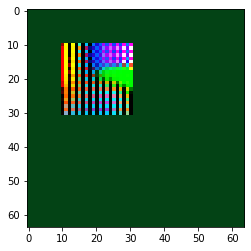

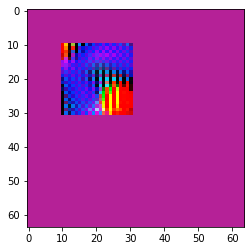

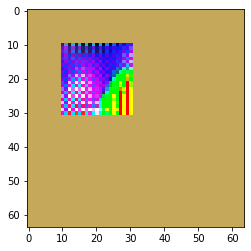

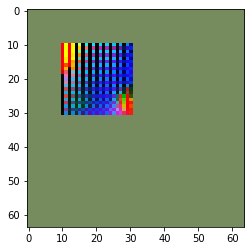

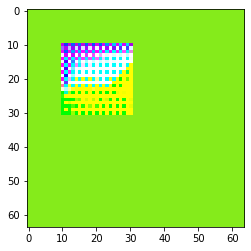

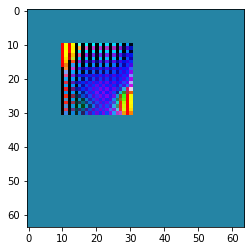

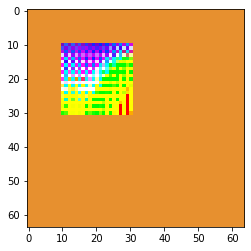

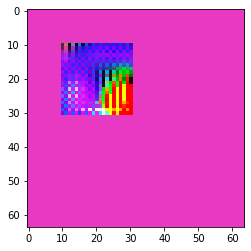

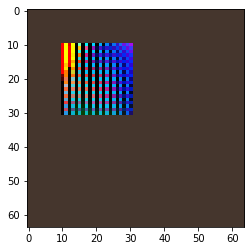

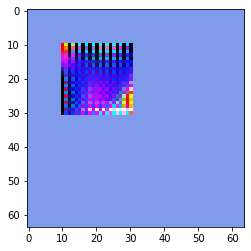

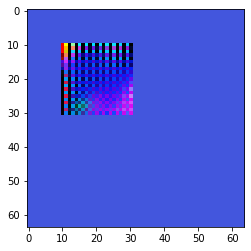

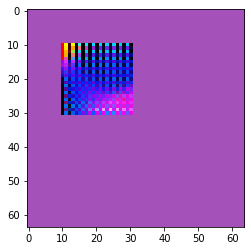

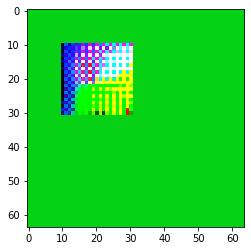

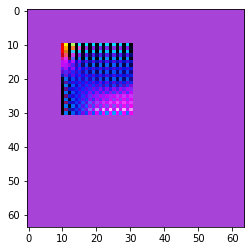

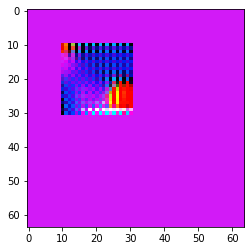

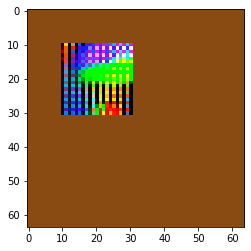

In [70]:
image_saver = data_saver.ImageSaver(image_dir + '/phase10')
images, masks, masked_images = next(batches)
generated_images = generator.predict([images, masks])
for i in range(batch_size):
#     plt.imshow(images[i])
#     plt.show()
#     plt.imshow(masked_images[i])
#     plt.show()
    plt.imshow(generated_images[i])
    plt.show()
    image_saver.save_image('{}.jpg'.format(i), generated_images[i])

In [71]:
generator.save_weights('generator_131.h5')
discriminator.save_weights('discriminator_131.h5')
full.save_weights('full_131.h5')
with open('generator_131.json', 'w') as f:
    f.write(generator.to_json())
with open('discriminator_131.json', 'w') as f:
    f.write(discriminator.to_json())
with open('full.json_131', 'w') as f:
    f.write(full.to_json())